<a href="https://colab.research.google.com/github/vani105/vani_Intern_Projects1/blob/main/Task_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Build a Simple Linear Regression model to study the linear relationship between Sales and Advertising dataset for a dietary weight control product. I discuss the basics of linear regression and its implementation in Python programming language using Scikit-learn. Scikit-learn is the popular machine learning library of Python programming language.


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Dataset

In [2]:
data = pd.read_csv('/content/Advertising.csv')
print(data.head())
print("Shape of dataset:\n")
print(data.shape)

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Shape of dataset:

(200, 5)


## Explore Dataset

* ED consists of:
  * Dataset info
  * Statstical Measures
  * Missing value check
  * Visualisation

#### Dataset info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Summary statistics

In [4]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


##### Check for missing values

In [5]:
data.isnull().sum()

,0
Unnamed: 0,0
TV,0
radio,0
newspaper,0
sales,0


#### Standardization

In [6]:
data.columns = data.columns.str.strip().str.lower()

#### Visualize relationship

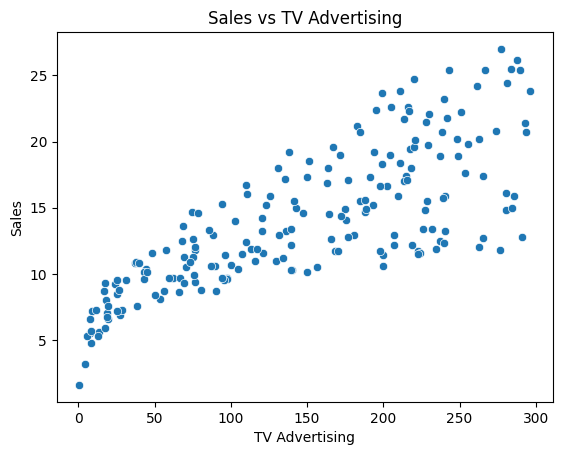

In [7]:
sns.scatterplot(x='tv', y='sales', data=data)
plt.title('Sales vs TV Advertising')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.show()

# Split Dataset into Training and Testing Sets

### Standardization

In [8]:
data.columns = data.columns.str.strip().str.lower()

### Feature Selection

In [9]:
X = data[['tv']]
y = data['sales']
print(X)
print(y)

        tv
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


### Train-Test Split Shapes

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(200, 1) (160, 1) (40, 1)


# Train the Model

### Train Linear Regression Model

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: 7.119638430592953
Coefficient: 0.046529733705443346


### Make Predictions

In [12]:
y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

     Actual  Predicted
95     16.9  14.717944
15     22.4  16.211548
30     21.4  20.748197
158     7.3   7.664036
128    24.7  17.370139


 ### Evaluate The Model

MSE: 10.204654118800956
RMSE: 3.194472431998898
R-squared: 0.6766954295627076


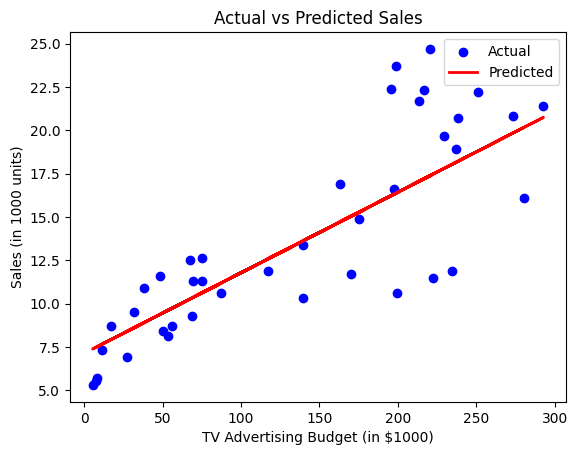

In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Sales')
plt.xlabel('TV Advertising Budget (in $1000)')
plt.ylabel('Sales (in 1000 units)')
plt.legend()
plt.show()
